# 1. EDA - 완료

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')
df.shape

/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_2727/222469946.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')


(666421, 29)

In [4]:
refined_df = df.drop(columns=df.columns.difference(['text', 'ratings_overall']))

<Axes: >

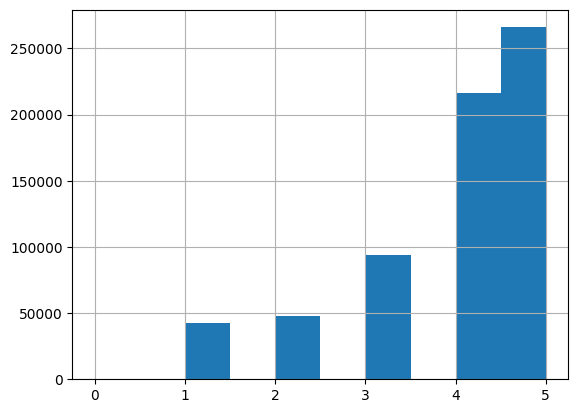

In [5]:
refined_df['ratings_overall'].hist()

In [6]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def map_ratings(value):
    if value in [1.0, 2.0, 3.0]:
        return 'low'
    elif value in [4.0, 5.0]:
        return 'high'
    else:
        return 'unknown'  # 다른 값에 대한 처리를 추가할 수도 있습니다.

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['ratings'] = refined_df['ratings_overall'].apply(map_ratings)

In [7]:
refined_df['ratings'].value_counts()

ratings
high       482500
low        183920
unknown         1
Name: count, dtype: int64

In [8]:
import pandas as pd

# 'high'와 'low'의 개수 구하기
high_count = refined_df['ratings'].value_counts()['high']
low_count = refined_df['ratings'].value_counts()['low']

# 'high'의 일부 행을 랜덤하게 삭제하여 개수를 'low'와 동일하게 만듦
refined_df_balanced = pd.concat([
    refined_df[refined_df['ratings'] == 'high'].sample(n=low_count, random_state=42),
    refined_df[refined_df['ratings'] == 'low']
])

# 결과 확인
print(refined_df_balanced['ratings'].value_counts())


ratings
high    183920
low     183920
Name: count, dtype: int64


In [9]:
import pandas as pd

# 'high'와 'low'의 개수 구하기
high_count = 50000
low_count = 50000

# 'high'와 'low'의 일부 행을 랜덤하게 추출하여 새로운 DataFrame 생성
refined_df_balanced = pd.concat([
    refined_df[refined_df['ratings'] == 'high'].sample(n=high_count, random_state=42),
    refined_df[refined_df['ratings'] == 'low'].sample(n=low_count, random_state=42)
])

# 결과 확인
print(refined_df_balanced['ratings'].value_counts())


ratings
high    50000
low     50000
Name: count, dtype: int64


In [10]:
refined_df = refined_df_balanced
refined_df.head(3)

,text,ratings_overall,ratings
631117,everyone from alby who made the reservation to...,5.0,high
507002,I stayed here for 6 nights over two consecutiv...,4.0,high
256569,Perfect location for seeing the sights in Holl...,4.0,high


In [11]:
# 'ratings_overall' 칼럼 삭제
refined_df = refined_df.drop('ratings_overall', axis=1)

# 결과 확인
print(refined_df.head())


                                                     text ratings
631117  everyone from alby who made the reservation to...    high
507002  I stayed here for 6 nights over two consecutiv...    high
256569  Perfect location for seeing the sights in Holl...    high
193612  Everything there has a golden logo of lion:tow...    high
139254  Stayed 3 nights. Absolutely great hotel. Frien...    high


# 2. 데이터 전처리

## 2.1 토큰화

In [12]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

2024-02-03 12:21:14.334762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
text = df['text'].iloc[0]
print('단어 토큰화3 :',text_to_word_sequence(text))

단어 토큰화3 : ['stayed', 'in', 'a', 'king', 'suite', 'for', '11', 'nights', 'and', 'yes', 'it', 'cots', 'us', 'a', 'bit', 'but', 'we', 'were', 'happy', 'with', 'the', 'standard', 'of', 'room', 'the', 'location', 'and', 'the', 'friendliness', 'of', 'the', 'staff', 'our', 'room', 'was', 'on', 'the', '20th', 'floor', 'overlooking', 'broadway', 'and', 'the', 'madhouse', 'of', 'the', 'fairway', 'market', 'room', 'was', 'quite', 'with', 'no', 'noise', 'evident', 'from', 'the', 'hallway', 'or', 'adjoining', 'rooms', 'it', 'was', 'great', 'to', 'be', 'able', 'to', 'open', 'windows', 'when', 'we', 'craved', 'fresh', 'rather', 'than', 'heated', 'air', 'the', 'beds', 'including', 'the', 'fold', 'out', 'sofa', 'bed', 'were', 'comfortable', 'and', 'the', 'rooms', 'were', 'cleaned', 'well', 'wi', 'fi', 'access', 'worked', 'like', 'a', 'dream', 'with', 'only', 'one', 'connectivity', 'issue', 'on', 'our', 'first', 'night', 'and', 'this', 'was', 'promptly', 'responded', 'to', 'with', 'a', 'call', 'from', '

In [14]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def tokenizer(text):
    return text_to_word_sequence(text)

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['tokens'] = refined_df['text'].apply(tokenizer)

# 결과 확인
print(refined_df)

                                                     text ratings  \
631117  everyone from alby who made the reservation to...    high   
507002  I stayed here for 6 nights over two consecutiv...    high   
256569  Perfect location for seeing the sights in Holl...    high   
193612  Everything there has a golden logo of lion:tow...    high   
139254  Stayed 3 nights. Absolutely great hotel. Frien...    high   
...                                                   ...     ...   
354800  The best thing we can say is the hotel clerks ...     low   
521987  This is no more than a 1 star property. Check-...     low   
268645  We said one night prior to joining a cruise. I...     low   
569439  From the outside, the place looked marvelous.B...     low   
378218  This hotel has a number of rooms which face a ...     low   

                                                   tokens  
631117  [everyone, from, alby, who, made, the, reserva...  
507002  [i, stayed, here, for, 6, nights, over, two

### 2.2.3 길이가 짧은 토큰들은 제거해주기

In [15]:
refined_df['tokens'] = refined_df['tokens'].apply(lambda token_list: [word for word in token_list if len(word) > 2])

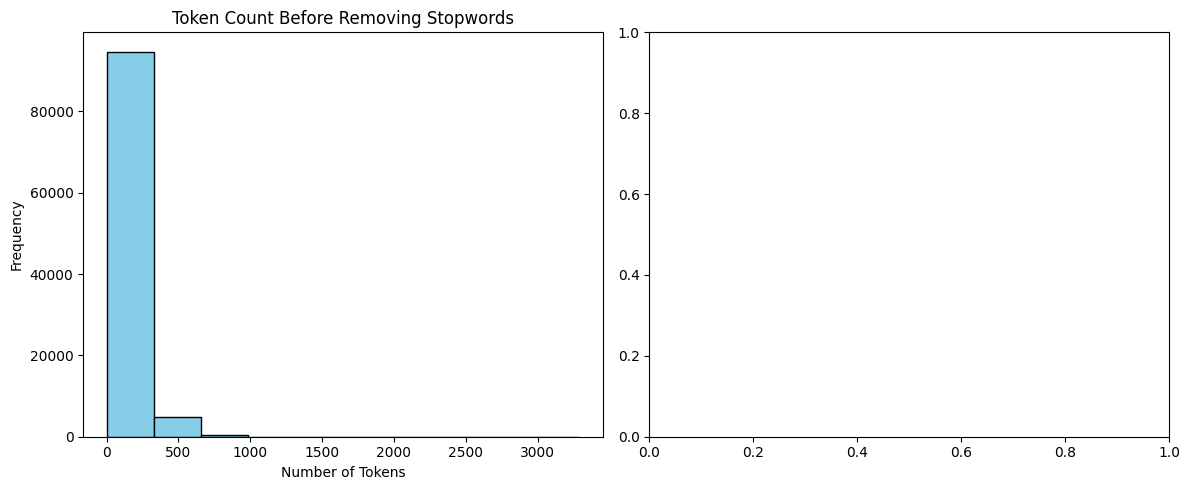

In [16]:
import matplotlib.pyplot as plt


# 불용어 제거 전의 토큰 개수
refined_df['token_count'] = refined_df['tokens'].apply(len)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 불용어 제거 전의 토큰 개수 시각화
axes[0].hist(refined_df['token_count'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Token Count Before Removing Stopwords')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.2.4 불용어 제거해주기

In [17]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK에서 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/songye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 불용어 제거

In [18]:

# NLTK에서 제공하는 불용어 리스트
stop_words = set(stopwords.words('english'))

# 'tokens' 칼럼에 있는 리스트에서 불용어 제거
refined_df['tokens'] = refined_df['tokens'].apply(lambda token_list: [word for word in token_list if word.lower() not in stop_words])


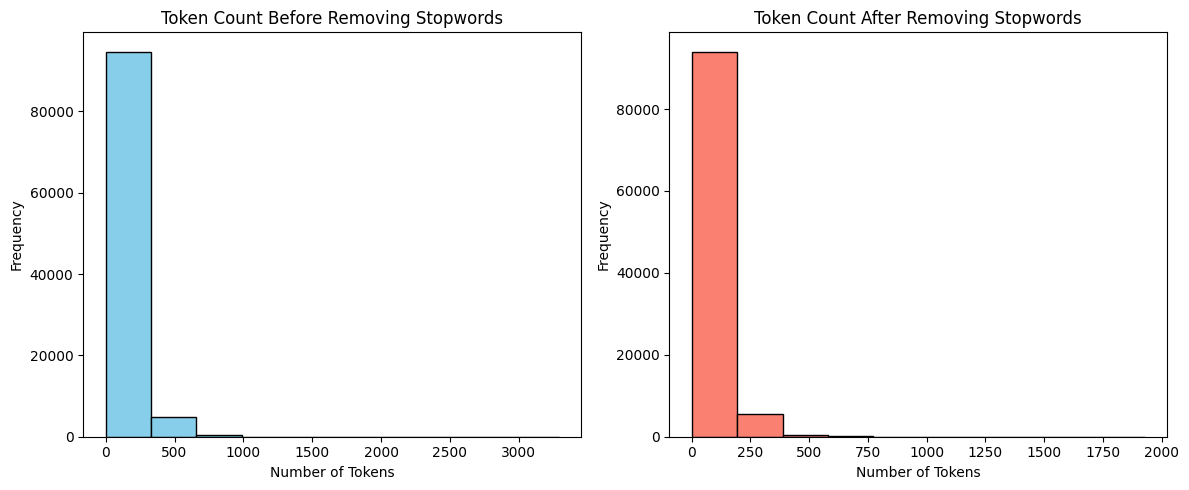

In [19]:

refined_df['token_count_after'] = refined_df['tokens'].apply(len)

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 불용어 제거 전의 토큰 개수 시각화
axes[0].hist(refined_df['token_count'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Token Count Before Removing Stopwords')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')

# 불용어 제거 후의 토큰 개수 시각화
axes[1].hist(refined_df['token_count_after'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Token Count After Removing Stopwords')
axes[1].set_xlabel('Number of Tokens')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2.2 정제 및 정규화

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# TfidfVectorizer를 사용하여 TF-IDF 행렬 생성
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(refined_df['tokens'].apply(lambda x: ' '.join(x)))

# TF-IDF 행렬을 DataFrame으로 변환 (선택사항, 확인용)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 특정 기준에 따라 단어 선택 (예: TF-IDF 값이 일정 threshold 이상인 경우)
selected_words = tfidf_df.columns[tfidf_df.mean() > 0.1]  # 예시: 평균 TF-IDF 값이 0.1 이상인 단어 선택

# 선택된 단어들로 새로운 'tokens' 칼럼 생성
refined_df['tokens_tfidf'] = refined_df['tokens'].apply(lambda x: [word for word in x if word in selected_words])


: 

In [20]:
# 토큰의 개수가 200개 미만인 비율 구하기
row_count_less_than_200 = len(refined_df[refined_df['token_count_after'] < 200])
total_rows = len(refined_df)
ratio_less_than_250_rows = row_count_less_than_200 / total_rows

# 결과 출력
print(f"비율: {ratio_less_than_250_rows:.2%}")

비율: 94.51%


In [21]:
refined_df.head(3)

,text,ratings,tokens,token_count,token_count_after
631117,everyone from alby who made the reservation to...,high,"[everyone, alby, made, reservation, deenny, gr...",37,27
507002,I stayed here for 6 nights over two consecutiv...,high,"[stayed, nights, two, consecutive, weeks, busi...",46,31
256569,Perfect location for seeing the sights in Holl...,high,"[perfect, location, seeing, sights, hollywood,...",63,41


- 과정
- 토큰화
- 시퀀스로 만들기
- 그 다음 패딩 처리
- glove로 임베딩 처리

## 2.5 패딩 처리

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# 예시 데이터 (refined_df['tokens']에 토큰이 이미 들어가 있다고 가정)
# 토큰화된 데이터가 저장된 컬럼 이름이 'tokens'일 경우:
tokenized_text = refined_df['tokens']

# 토크나이저 객체 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_text)

# 토큰들을 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(tokenized_text)

# 시퀀스 패딩
max_sequence_length = 200  # 시퀀스의 최대 길이 (임의 설정)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [23]:
padded_sequences[1]

array([  13,   59,   38, 6505,  852,   86,    9,  109,    1,   14,  145,
        365,  292,  171, 1360, 1762,   85,  512,   60,  191,   20,  243,
       2049,   17,   75,  329, 3550,   46, 1134,   54, 7264,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## 2.4 텍스트 벡터화
- Word2Vec
- GloVe
- BERT

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import KeyedVectors

In [1]:
import torchtext.vocab

glove = torchtext.vocab.GloVe(name='6B', dim=100) # 이미 학습된 것을 불러오기만 하는 것임. torchtext의 vocab에 존재.
# hidden size를 몇으로 정할래이다. V -> hidden (100 / 300 / 512 / 256)
print(f'There are {len(glove.itos)} words in the vocabulary')
# itos -> dictionary의 사이즈가 무엇이냐는 것.
# 우리는 지금 아래와 같이 400000개의 words를 사용 가능함.

: 

In [26]:
embedding_dim = glove.vectors.shape[1]
embedding_dim

100

In [27]:
import torch
import torch.nn.functional as F

# 예시: 패딩된 시퀀스
padded_sequence = torch.tensor(padded_sequences)

# 임베딩 차원 설정
embedding_dim = 100

# 패딩된 시퀀스를 GloVe 임베딩으로 변환
embedded_sequence = F.embedding(padded_sequence, glove.vectors)


In [28]:
# X data
embedded_sequence.shape 


torch.Size([100000, 200, 100])

In [29]:
refined_df['ratings'].shape

(100000,)

In [30]:
import torch

In [31]:
torch.save(embedded_sequence, '../dataset/240128_TripAdvisorHotelReviews/feature_tensor.pt')

In [34]:
np.save('../dataset/240128_TripAdvisorHotelReviews/labels.npy', refined_df['ratings'].to_numpy())

In [2]:
# 저장된 파일 불러오기
import torch
embedded_sequence = torch.load('../dataset/240128_TripAdvisorHotelReviews/feature_tensor.pt')

# 불러온 데이터 확인
print(embedded_sequence.size())

torch.Size([100000, 200, 100])


In [3]:
import numpy as np

# 저장된 파일 불러오기
labels = np.load('../dataset/240128_TripAdvisorHotelReviews/labels.npy', allow_pickle=True)

# 불러온 데이터 확인
print(labels)


['high' 'high' 'high' ... 'low' 'low' 'low']


In [4]:
import numpy as np
labels = np.array([1 if value == 'high' else 0 for value in labels])

print(labels)

[1 1 1 ... 0 0 0]


# 3. 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split

# PyTorch DataLoader로 사용할 데이터셋 클래스를 정의하고 데이터를 생성하는 작업이 필요

# 예시: X는 embedded_sequence, y는 refined_df['ratings']
X_train, X_temp, y_train, y_temp = train_test_split(embedded_sequence, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 결과 확인
print("Train data shapes:", X_train.shape, y_train.shape)
print("Validation data shapes:", X_val.shape, y_val.shape)
print("Test data shapes:", X_test.shape, y_test.shape)


Train data shapes: torch.Size([70000, 200, 100]) (70000,)
Validation data shapes: torch.Size([15000, 200, 100]) (15000,)
Test data shapes: torch.Size([15000, 200, 100]) (15000,)


In [6]:
y_val.shape

(15000,)

In [7]:
import numpy as np

# 예시 데이터
dataset = {
    'X_train': X_train.numpy(),
    'y_train': y_train,
    'X_val': X_val.numpy(),
    'y_val': y_val,
    'X_test': X_test.numpy(),
    'y_test': y_test
}

# Numpy 배열로 저장
np.savez('../dataset/240128_TripAdvisorHotelReviews/train_test_dataset.npz', **dataset)


In [8]:
import numpy as np
import torch

# Numpy 배열로 저장된 데이터 불러오기
loaded_data_npz = np.load('../dataset/240128_TripAdvisorHotelReviews/train_test_dataset.npz', allow_pickle=True)

# 데이터 형식 변환
X_train = torch.Tensor(loaded_data_npz['X_train'].astype(np.float32))
y_train = torch.Tensor(y_train.astype(np.float32))
X_val = torch.Tensor(loaded_data_npz['X_val'].astype(np.float32))
y_val = torch.Tensor(y_val.astype(np.float32))
X_test = torch.Tensor(loaded_data_npz['X_test'].astype(np.float32))
y_test = torch.Tensor(y_test.astype(np.float32))


In [9]:
X_train.shape

torch.Size([70000, 200, 100])

# 4. 모델 선택 및 구성

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터셋을 플랫하게 펼침
X_train_flat = X_train.view(X_train.size(0), -1).numpy()
X_val_flat = X_val.view(X_val.size(0), -1).numpy()

# 5. 모델 컴파일 및 학습

In [ ]:
# 모델 초기화
model = LogisticRegression()

# 모델 학습
model.fit(X_train_flat, y_train)


# 6. 모델 평가

In [ ]:
# 예측
y_pred = model.predict(X_val_flat)

# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

# 7. 하이퍼파라미터 튜닝